In [3]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from pandas_datareader import data as pdr
unrate = pdr.DataReader(
    name = "UNRATE",
    data_source = "fred",
    start = "1950-01-01"
)
print(unrate.head())

            UNRATE
DATE              
1950-01-01     6.5
1950-02-01     6.4
1950-03-01     6.3
1950-04-01     5.8
1950-05-01     5.5


In [5]:
unrate.index.max()

Timestamp('2025-12-01 00:00:00')

In [6]:
unrate = unrate.loc[:"2025-11-01"]

In [7]:
unrate.index.max()

Timestamp('2025-11-01 00:00:00')

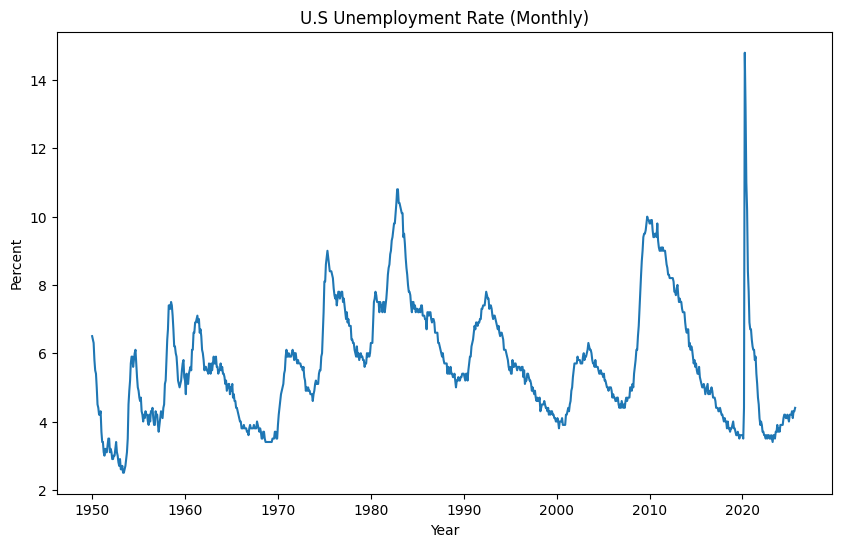

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(unrate.index, unrate["UNRATE"])
plt.title("U.S Unemployment Rate (Monthly)")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.show()

In [10]:
unrate.columns

Index(['UNRATE'], dtype='object')

In [7]:
unrate["UNRATE_lag1"] = unrate["UNRATE"].shift(1)

In [8]:
dir()

['In',
 'Out',
 '_',
 '_3',
 '_4',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'open',
 'pd',
 'pdr',
 'quit',
 'unrate']

In [4]:
globals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', '_i2', '_i3', '_3', '_i4'])

In [10]:
unrate[["UNRATE", "UNRATE_lag1"]].head(10)

,UNRATE,UNRATE_lag1
DATE,,
1950-01-01,6.5,NaN
1950-02-01,6.4,6.5
1950-03-01,6.3,6.4
1950-04-01,5.8,6.3
1950-05-01,5.5,5.8
1950-06-01,5.4,5.5
1950-07-01,5.0,5.4
1950-08-01,4.5,5.0
1950-09-01,4.4,4.5


In [12]:
df_lag =unrate[["UNRATE", "UNRATE_lag1"]].dropna()

In [13]:
unrate[["UNRATE", "UNRATE_lag1"]].head(10)

,UNRATE,UNRATE_lag1
DATE,,
1950-01-01,6.5,NaN
1950-02-01,6.4,6.5
1950-03-01,6.3,6.4
1950-04-01,5.8,6.3
1950-05-01,5.5,5.8
1950-06-01,5.4,5.5
1950-07-01,5.0,5.4
1950-08-01,4.5,5.0
1950-09-01,4.4,4.5


In [15]:
lag1_corr = df_lag["UNRATE"].corr(df_lag["UNRATE_lag1"])
print("Lag-1 autocorrelation:", lag1_corr)

Lag-1 autocorrelation: 0.9709433711455118


In [18]:
#How much does unemployment today depend on unemployment one year ago?

unrate["UNRATE_lag12"] = unrate["UNRATE"].shift(12)
unrate[["UNRATE", "UNRATE_lag12"]].head(20)

,UNRATE,UNRATE_lag12
DATE,,
1950-01-01,6.5,NaN
1950-02-01,6.4,NaN
1950-03-01,6.3,NaN
1950-04-01,5.8,NaN
1950-05-01,5.5,NaN
1950-06-01,5.4,NaN
1950-07-01,5.0,NaN
1950-08-01,4.5,NaN
1950-09-01,4.4,NaN


In [25]:
df_lag12 = unrate[["UNRATE","UNRATE_lag12"]].dropna()
lag_corr12 = df_lag12["UNRATE"].corr(df_lag12["UNRATE_lag12"])
print("Lag-12 autocorrelation:", lag_corr12)

Lag-12 autocorrelation: 0.6693747119096511


In [27]:
unrate_2025 = unrate.loc["2025-01-01":"2025-12-01"]

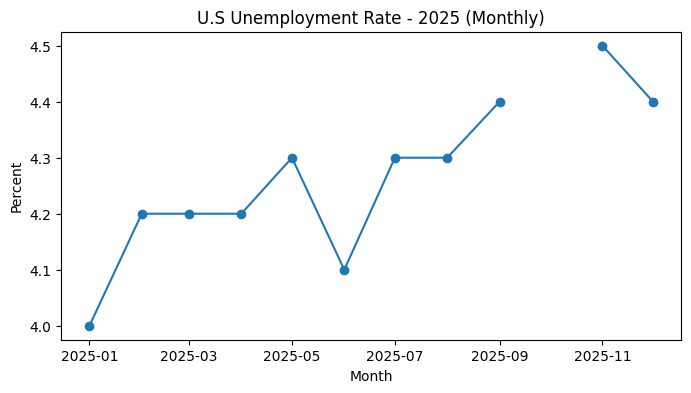

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(unrate_2025.index, unrate_2025["UNRATE"], marker="o")
plt.title("U.S Unemployment Rate - 2025 (Monthly)")
plt.xlabel("Month")
plt.ylabel("Percent")
plt.show()

In [30]:
unrate_2025.index

DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [31]:
unrate_2025.index.month


Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='DATE')

In [32]:
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


NameError: name 'Int64Index' is not defined

In [33]:
unrate.loc["2025-10-01":"2025-10-01"]


,UNRATE,UNRATE_lag1,UNRATE_lag12
DATE,,,
2025-10-01,NaN,4.4,4.1


In [34]:
unrate.loc["2025-10"]


,UNRATE,UNRATE_lag1,UNRATE_lag12
DATE,,,
2025-10-01,NaN,4.4,4.1


In [35]:
unrate.loc["2025-10-01", "UNRATE"] = 4.5

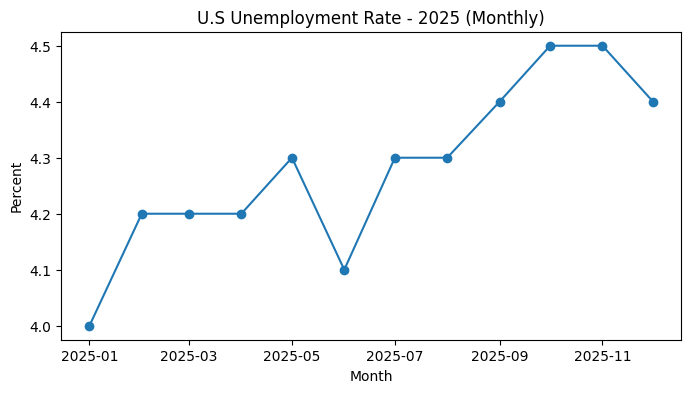

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(unrate_2025.index, unrate_2025["UNRATE"], marker="o")
plt.title("U.S Unemployment Rate - 2025 (Monthly)")
plt.xlabel("Month")
plt.ylabel("Percent")
plt.show()

In [40]:
def plot_year(unrate, year):
    data_year = unrate.loc[f"{year}-01-01":f"{year}-12-01"].dropna()
    plt.figure(figsize=(8,4))
    plt.plot(data_year.index.month, data_year["UNRATE"],marker="o")
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Unemployment Rate (%)")
    plt.title(f"U.S Unemployment Rate - {year}")
    plt.grid(True)
    plt.show()

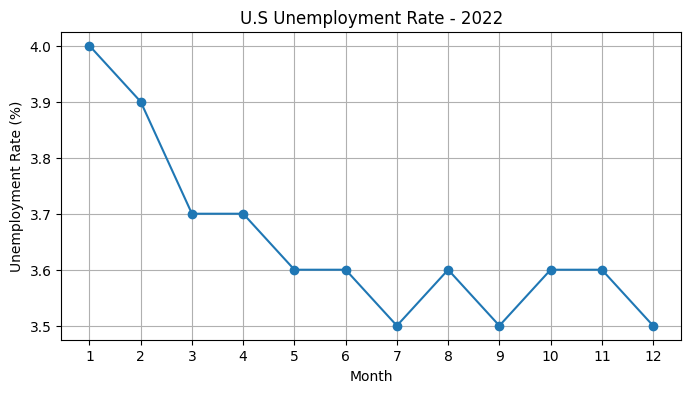

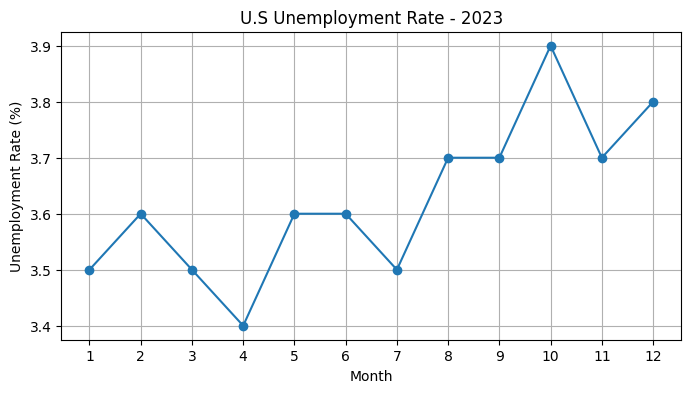

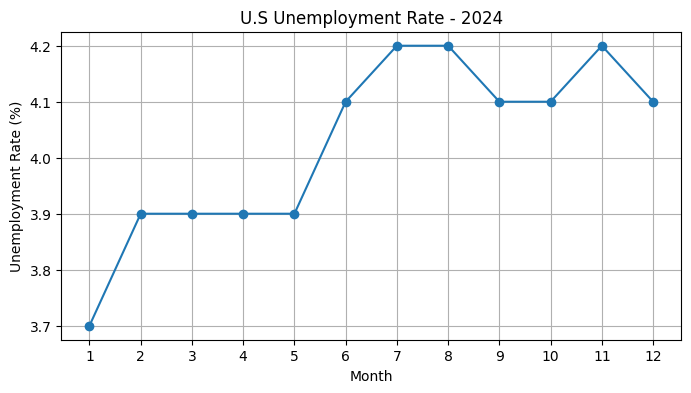

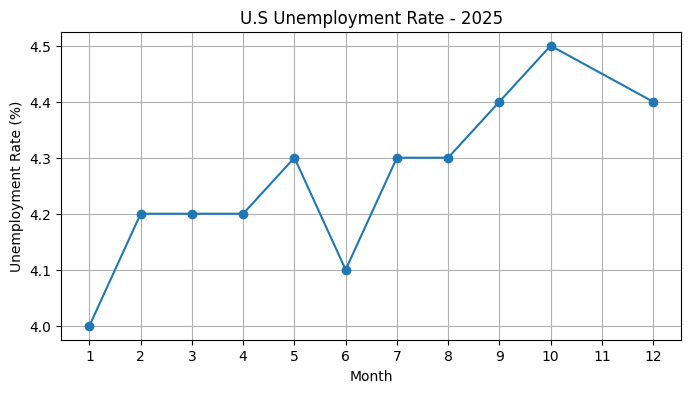

In [41]:
for year in [2022, 2023, 2024, 2025]:
    plot_year(unrate, year)


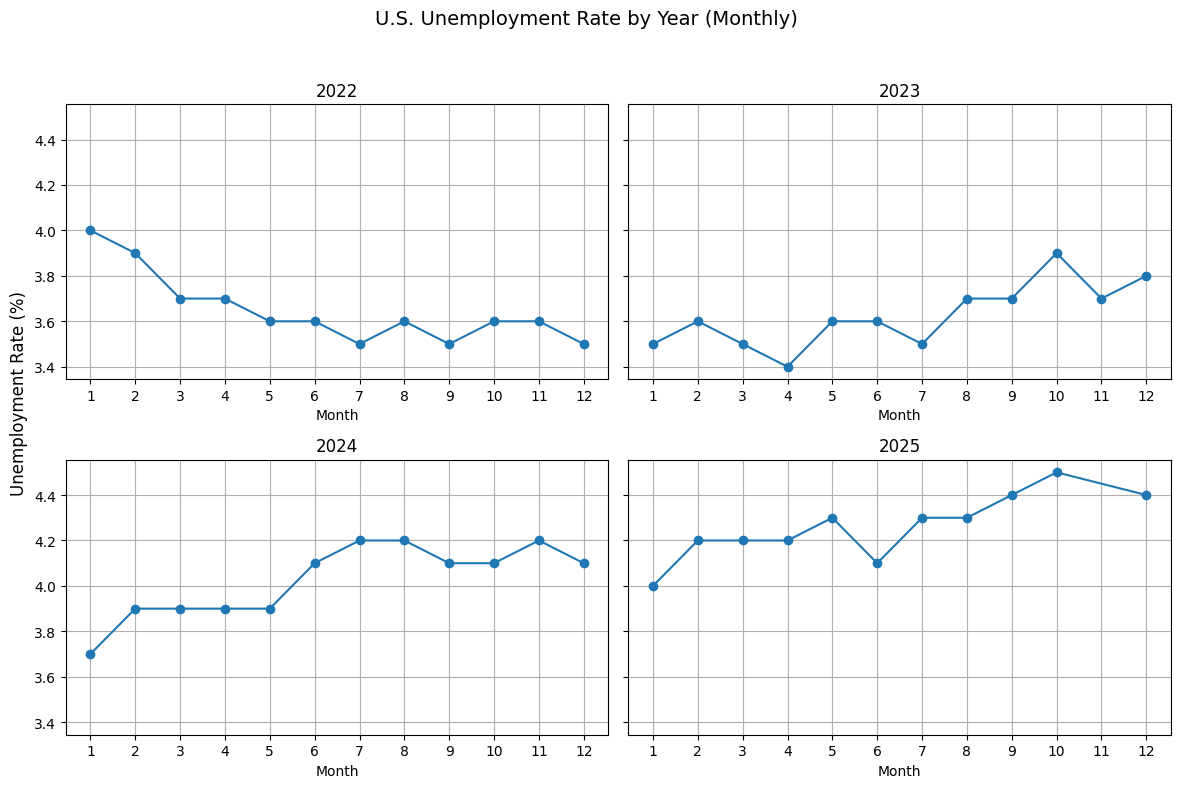

In [42]:
import matplotlib.pyplot as plt

years = [2022, 2023, 2024, 2025]

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()  # make it easy to loop

for ax, year in zip(axes, years):
    data_year = unrate.loc[f"{year}-01-01":f"{year}-12-01"].dropna()
    
    ax.plot(data_year.index.month, data_year["UNRATE"], marker="o")
    ax.set_xticks(range(1, 13))
    ax.set_xlabel("Month")
    ax.set_title(f"{year}")
    ax.grid(True)

# Common y-axis label
fig.supylabel("Unemployment Rate (%)")
fig.suptitle("U.S. Unemployment Rate by Year (Monthly)", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [43]:
T = unrate["UNRATE"].dropna().shape[0]
print(T)

912


In [45]:
import numpy as np
T = 912
band_95 = 1.96/np.sqrt(T)
band_apprx = 2/np.sqrt(T)

In [46]:
rho12 = lag_corr12

In [47]:
print("rho12:", rho12)

rho12: 0.6693747119096511


In [48]:
t12 = rho12 *np.sqrt (T)

In [49]:
print("t12:",t12,"reject?", abs(t12)>1.96)

t12: 20.214673000299687 reject? True


In [50]:
x = unrate["UNRATE"].dropna()
lag = 38
rho_38 = x.corr(x.shift(lag))
print("Lag-38 autocorrelation:",rho_38)

Lag-38 autocorrelation: 0.21343261373490585


<Figure size 1000x600 with 0 Axes>

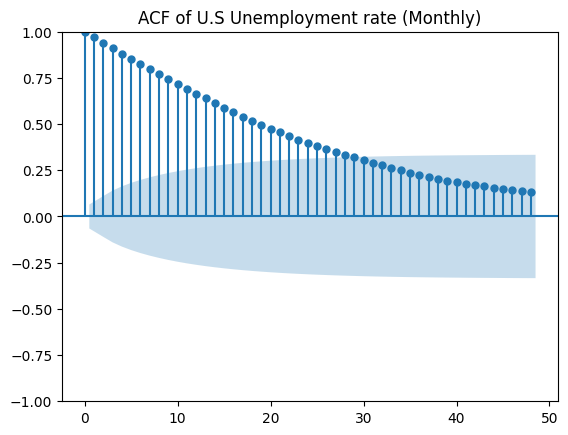

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
x = unrate["UNRATE"].dropna()
plt.figure(figsize=(10,6))
plot_acf(x, lags=48)
plt.title("ACF of U.S Unemployment rate (Monthly)")
plt.show()

In [52]:
import numpy as np
T= len(x.dropna())
t_38 =rho_38*np.sqrt(T)
print("t-stat approx:",t_38)

t-stat approx: 6.445523587142532


In [53]:
print("Significant at 5%?", abs(t_38)>1.96)

Significant at 5%? True


In [55]:
from statsmodels.tsa.ar_model import AutoReg
ar1_model = AutoReg(x, lags=1, trend= "c", old_names = False)
ar1_res = ar1_model.fit()
print(ar1_res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 UNRATE   No. Observations:                  912
Model:                     AutoReg(1)   Log Likelihood                -477.701
Method:               Conditional MLE   S.D. of innovations              0.409
Date:                Mon, 02 Feb 2026   AIC                            961.401
Time:                        19:02:37   BIC                            975.845
Sample:                    02-01-1950   HQIC                           966.916
                         - 12-01-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1617      0.047      3.436      0.001       0.069       0.254
UNRATE.L1      0.9712      0.008    122.526      0.000       0.956       0.987
                                    Roots           

C:\Users\mestr\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'AR(1) Residuals'}, xlabel='DATE'>

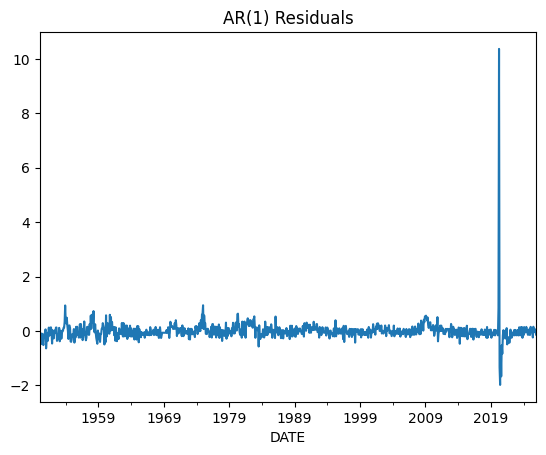

In [56]:
resid = ar1_res.resid

resid.plot(title="AR(1) Residuals")


In [57]:
from statsmodels.tsa.ar_model import AutoReg
ar12_model = AutoReg(x, lags=12, trend= "c", old_names = False)
ar12_res = ar12_model.fit()
print(ar12_res.summary())

C:\Users\mestr\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:                 UNRATE   No. Observations:                  912
Model:                    AutoReg(12)   Log Likelihood                -469.368
Method:               Conditional MLE   S.D. of innovations              0.408
Date:                Mon, 02 Feb 2026   AIC                            966.736
Time:                        19:16:45   BIC                           1033.969
Sample:                    01-01-1951   HQIC                           992.419
                         - 12-01-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1861      0.051      3.655      0.000       0.086       0.286
UNRATE.L1      1.0356      0.033     31.077      0.000       0.970       1.101
UNRATE.L2     -0.1147      0.048     -2.391      0.0

<Figure size 1000x800 with 0 Axes>

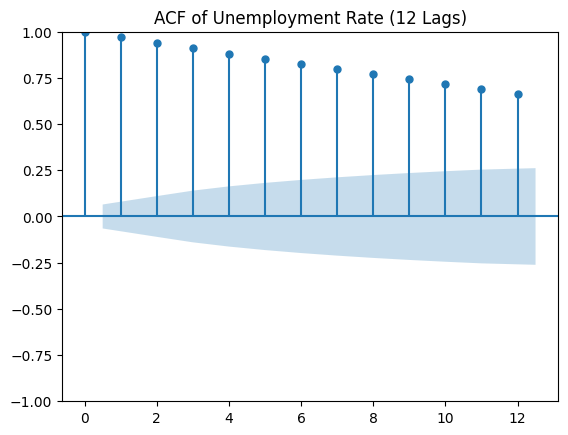

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
x= unrate["UNRATE"].dropna()
plt.figure(figsize=(10,8))
plot_acf(x, lags = 12)
plt.title("ACF of Unemployment Rate (12 Lags)")
plt.show()

In [61]:
from statsmodels.tsa.ar_model import AutoReg
ar6_model = AutoReg(x, lags=6, trend= "c", old_names = False)
ar6_res = ar6_model.fit()
print(ar6_res.summary())

C:\Users\mestr\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:                 UNRATE   No. Observations:                  912
Model:                     AutoReg(6)   Log Likelihood                -472.198
Method:               Conditional MLE   S.D. of innovations              0.407
Date:                Mon, 02 Feb 2026   AIC                            960.396
Time:                        19:45:10   BIC                            998.868
Sample:                    07-01-1950   HQIC                           975.088
                         - 12-01-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1688      0.049      3.468      0.001       0.073       0.264
UNRATE.L1      1.0384      0.033     31.266      0.000       0.973       1.103
UNRATE.L2     -0.1135      0.048     -2.373      0.0

In [62]:
ar6_res.params

const        0.168754
UNRATE.L1    1.038363
UNRATE.L2   -0.113485
UNRATE.L3    0.087559
UNRATE.L4   -0.086690
UNRATE.L5    0.071967
UNRATE.L6   -0.027582
dtype: float64

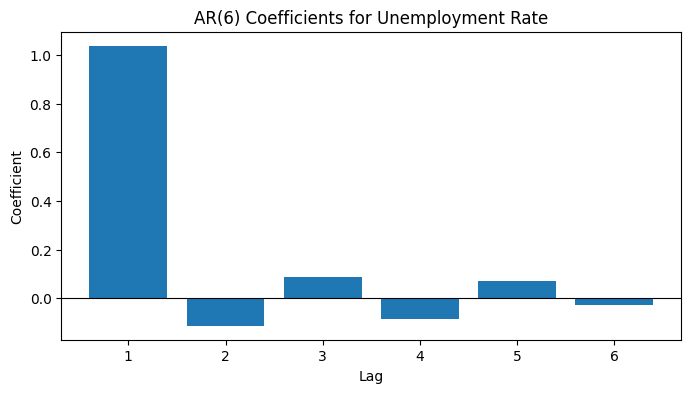

In [64]:
params = ar6_res.params.drop("const")
plt.figure(figsize=(8,4))
plt.bar(range(1,7), params.values)
plt.axhline(0, color = "black", linewidth = 0.8)
plt.xlabel("Lag")
plt.ylabel("Coefficient")
plt.title("AR(6) Coefficients for Unemployment Rate")
plt.xticks(range(1,7))
plt.show()

<Figure size 800x400 with 0 Axes>

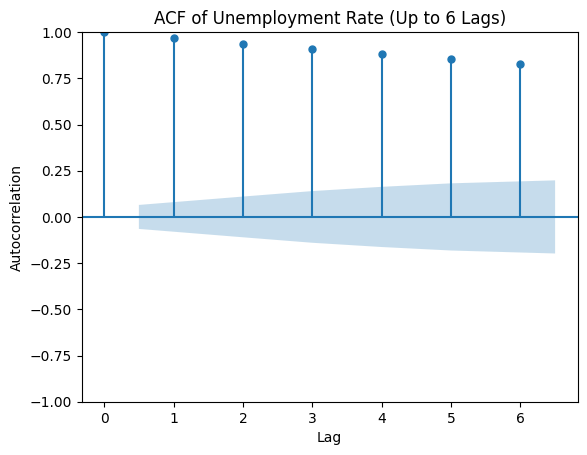

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
x = unrate["UNRATE"].dropna()
plt.figure(figsize=(8,4))
plot_acf(x,lags=6)
plt.title("ACF of Unemployment Rate (Up to 6 Lags)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

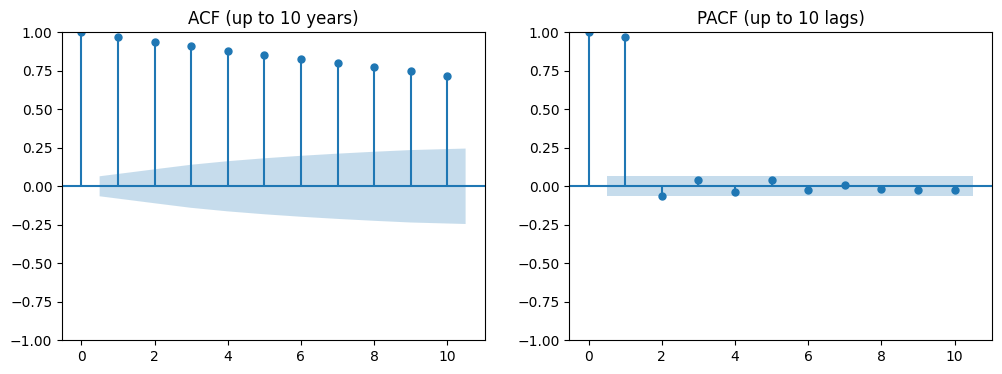

In [67]:
#PACF
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
x = unrate ["UNRATE"].dropna()
fig,axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(x,lags=10, ax=axes[0])
axes[0].set_title("ACF (up to 10 years)")
plot_pacf(x, lags = 10, method= "ywm", ax=axes[1])
axes[1].set_title("PACF (up to 10 lags)")
plt.tight_layout
plt.show()

In [80]:
nlags = 10
def acovf_adjusted(x:np.ndarray, nlags:int)->np.ndarray:
    x = np.asarray(x, dtype=float)
    x=x[np.isfinite(x)]
    T=x.size
    mu = x.mean()
    xc = x- mu
    gamma = np.empty(nlags + 1)
    for k in range(nlags+1):
      gamma[k] = np.sum(xc[k:]*xc[:T-k])/(T-k)
    return gamma

In [81]:
print(gamma)

[0.0e+000 4.9e-324 9.9e-324 1.5e-323 2.0e-323 2.5e-323 3.0e-323 3.5e-323
 4.0e-323 4.4e-323 4.9e-323]


In [89]:
def toeplitz_from_gamma(gamma:np.ndarray, k:int) -> np.ndarray:
 idx = np.abs(np.subtract.outer(np.arange(k), np.arange(k)))
 return gamma[idx]


In [91]:
def pacf_ywm_manual(x, nlags: int):
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    gamma = acovf_adjusted(x,nlags)
    pacf = np.zeros(nlags + 1)
    pacf[0] = 1.0

    for k in range(1, nlags+1):
     R= toeplitz_from_gamma(gamma, k)
     r= gamma[1:k+1]
     phi = np.linalg.solve(R,r)
     pacf[k] = phi[-1]
    return pacf

x= unrate["UNRATE"].dropna().to_numpy()
pacf_vals = pacf_ywm_manual(x, nlags=10)

for k in range(0,11):
    print(f"PACF({k}) = {pacf_vals[k]:.4f}")
    

PACF(0) = 1.0000
PACF(1) = 0.9716
PACF(2) = -0.0640
PACF(3) = 0.0407
PACF(4) = -0.0386
PACF(5) = 0.0447
PACF(6) = -0.0282
PACF(7) = 0.0115
PACF(8) = -0.0166
PACF(9) = -0.0271
PACF(10) = -0.0270


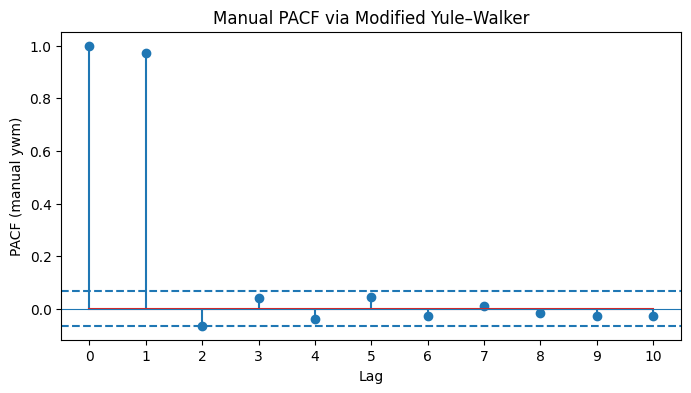

In [92]:
import matplotlib.pyplot as plt

lags = np.arange(len(pacf_vals))

plt.figure(figsize=(8,4))
plt.stem(lags, pacf_vals)
plt.axhline(0, linewidth=0.8)

# approx 95% band
T = len(x)
band = 2 / np.sqrt(T)
plt.axhline(band, linestyle="--")
plt.axhline(-band, linestyle="--")

plt.xticks(lags)
plt.xlabel("Lag")
plt.ylabel("PACF (manual ywm)")
plt.title("Manual PACF via Modified Yule–Walker")
plt.show()


In [93]:
# to determine the order of p in AR
print("AR(2)  AIC:", ar2_res.aic)
print("AR(6)  AIC:", ar6_res.aic)
print("AR(12) AIC:", ar12_res.aic)


NameError: name 'ar2_res' is not defined

In [ ]:
resid = ar1_res.resid


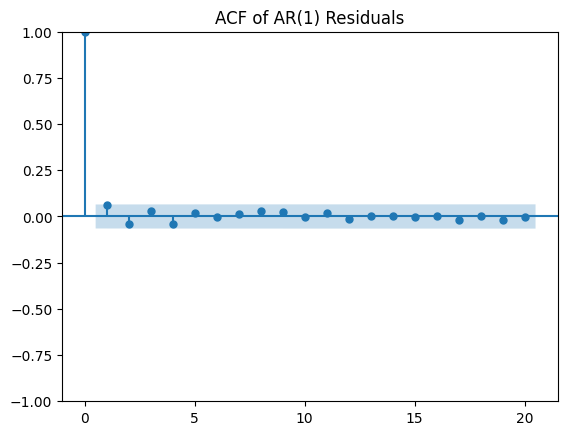

In [97]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(resid, lags=20)
plt.title("ACF of AR(1) Residuals")
plt.show()


In [98]:
resid_ar1  = ar1_res.resid
resid_ar6  = ar6_res.resid
resid_ar12 = ar12_res.resid

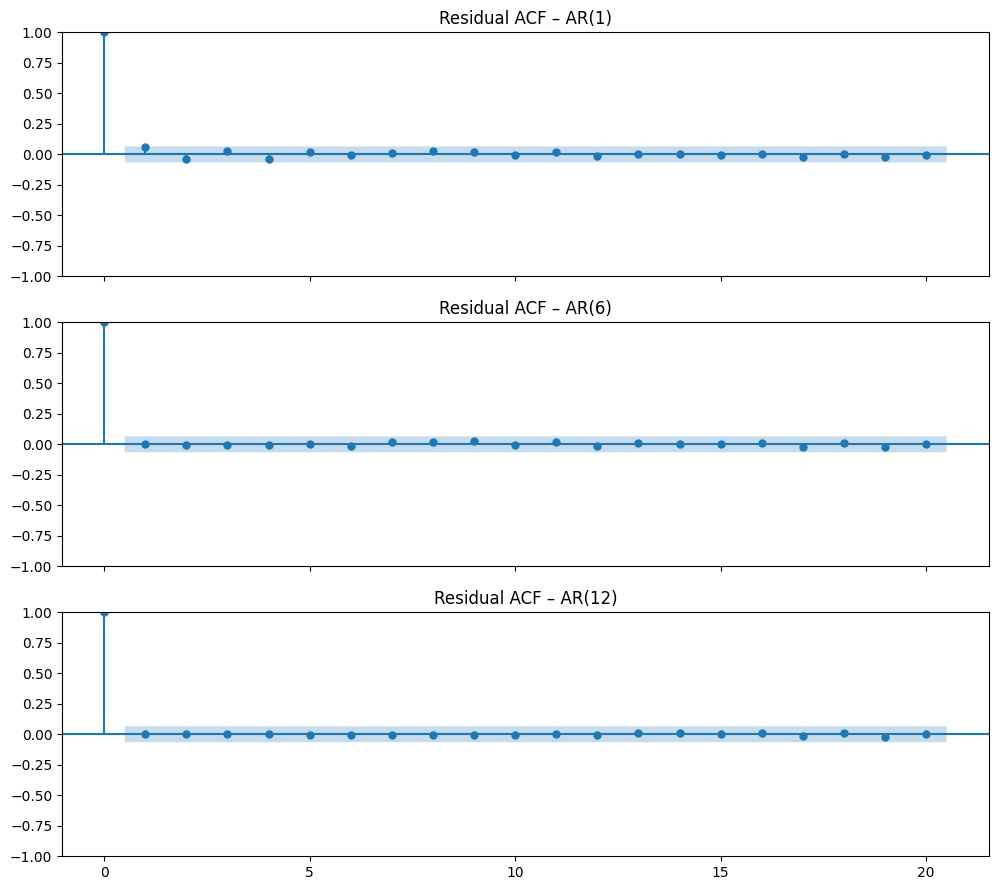

In [99]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

plot_acf(resid_ar1,  lags=20, ax=axes[0])
axes[0].set_title("Residual ACF – AR(1)")

plot_acf(resid_ar6,  lags=20, ax=axes[1])
axes[1].set_title("Residual ACF – AR(6)")

plot_acf(resid_ar12, lags=20, ax=axes[2])
axes[2].set_title("Residual ACF – AR(12)")

plt.tight_layout()
plt.show()



In [106]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [107]:
models = {
    "AR(1)": ar1_res.resid,
    "AR(6)": ar6_res.resid,
    "AR(12)": ar12_res.resid
}
for name, resid in models.items():
    print(f"\n{name} Ljung–Box test")
    lb = acorr_ljungbox(resid, lags=[12, 24], return_df=True)
    print(lb)


AR(1) Ljung–Box test
      lb_stat  lb_pvalue
12   9.207322   0.685128
24  10.993300   0.989060

AR(6) Ljung–Box test
     lb_stat  lb_pvalue
12  2.157608   0.999123
24  4.031341   0.999999

AR(12) Ljung–Box test
     lb_stat  lb_pvalue
12  0.132531        1.0
24  2.013467        1.0
